# Head pose

In this notebook we will extract and visualize the face head pose. We will also learn to work with our extrinsic matrix and product the axis in the image plane. Here's where you can learn more about our [camera configuration modalities](https://docs.datagen.tech/en/latest/Modalities/Where%20to%20find.html?highlight=extrinsic#camera-level-modalities).

## Imports

In [1]:
import matplotlib.pyplot as plt
import datagen
import dghelpers
from dghelpers import imshow

from scipy.spatial.transform import Rotation as R

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
dp = datagen.load(DATASET_PATH)[0]

## Head coordinates system

World to image function definition

In [3]:
world_to_img = lambda x : dghelpers.world_to_img(x, dp.camera_metadata.intrinsic_matrix, dp.camera_metadata.extrinsic_matrix)
extrinsic_rotation = dp.camera_metadata.extrinsic_matrix[:, :3]

Let's represent the head rotation as a Scipy Rotation object. Our convention is: **Pitch (x axis) -> Yaw (z axis) -> Roll (y axis)** and the rotation is **extrinsic**<br> 
This reprensentation will let us convert the head rotation to a rotation matrix, a rotation vector or a quaternion.



In [4]:
head_rotation = dp.actor_metadata.head_metadata.head_rotation

head_rotation_obj = R.from_euler('xzy', [head_rotation.pitch, head_rotation.yaw, head_rotation.roll], degrees=True)
print(f'Matrix conversion: {head_rotation_obj.as_matrix()}')
print(f'Rotation vector conversion: {head_rotation_obj.as_rotvec()}')
print(f'Quaternion conversion: {head_rotation_obj.as_quat()}')

Matrix conversion: [[ 0.97264071  0.22745827  0.04725232]
 [-0.23231454  0.95230877  0.19783318]
 [ 0.         -0.20339801  0.97909614]]
Rotation vector conversion: [-0.20388678  0.0240114  -0.23363488]
Quaternion conversion: [-0.10153301  0.01195737 -0.11634718  0.98793289]


Let's project the axes in the image plane. <br> 
To do so, we'll define the origin of the coordinates system as the point between the eyes, and we'll extract the head coordinates system (X, Y, Z vectors) from the matrix columns. <br>

In [5]:
head_location_world = dp.actor_metadata.head_metadata.head_six_dof.location
head_X_cam, head_Y_cam, head_Z_cam = (extrinsic_rotation @ head_rotation_obj.as_matrix()).T

We can do the same for the look-at vector.

In [6]:
look_at_cam = extrinsic_rotation @ dp.actor_metadata.head_metadata.head_six_dof.look_at_vector

Let's now plot the coordinates system

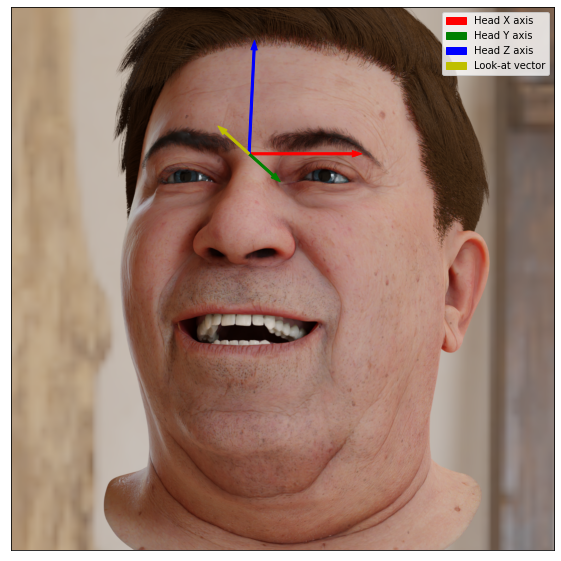

In [7]:
arrow_length = 200

head_center_cam = world_to_img(head_location_world)

imshow(dp.visible_spectrum)
plt.arrow(*head_center_cam, *(arrow_length * head_X_cam[:2]), color = 'r', label='Head X axis', width=4)
plt.arrow(*head_center_cam, *(arrow_length * head_Y_cam[:2]),  color = 'g', label='Head Y axis', width=4)
plt.arrow(*head_center_cam, *(arrow_length * head_Z_cam[:2]),  color = 'b', label='Head Z axis', width=4)
plt.arrow(*head_center_cam, *(arrow_length * look_at_cam[:2]),  color = 'y', label='Look-at vector', width=4)
plt.legend()